In [3]:
from diffusers import DiffusionPipeline



In [7]:
pipeline = DiffusionPipeline.from_pretrained("interactdiffusion/diffusers-v1-2")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


ValueError: The repository for interactdiffusion/diffusers-v1-2 contains custom code in pipeline_stable_diffusion_interactdiffusion.py which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/interactdiffusion/diffusers-v1-2/blob/main/pipeline_stable_diffusion_interactdiffusion.py.
Please pass the argument `trust_remote_code=True` to allow custom code to be run.

In [5]:
from huggingface_hub import notebook_login

In [6]:
notebook_login()

In [8]:
import torch

In [ ]:


pipeline = DiffusionPipeline.from_pretrained(
    "interactdiffusion/diffusers-v1-2",
    trust_remote_code=True,
    variant="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

In [18]:
images = pipeline(
    prompt="a person is feeding a cat",
    interactdiffusion_subject_phrases=["person"],
    interactdiffusion_object_phrases=["cat"],
    interactdiffusion_action_phrases=["feeding"],
    interactdiffusion_subject_boxes=[[0.0332, 0.1660, 0.3359, 0.7305]],
    interactdiffusion_object_boxes=[[0.2891, 0.4766, 0.6680, 0.7930]],
    interactdiffusion_scheduled_sampling_beta=1,
    output_type="pil",
    num_inference_steps=50,
    ).images


  0%|          | 0/50 [00:00<?, ?it/s]

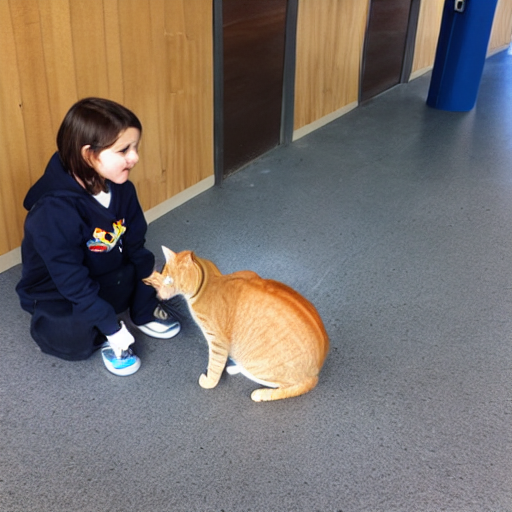

In [19]:
images[0]

In [22]:
pipeline

StableDiffusionInteractDiffusionPipeline {
  "_class_name": "StableDiffusionInteractDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "interactdiffusion/diffusers-v1-2",
  "feature_extractor": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers_modules.local.interactdiffusion_unet_2d_condition",
    "InteractDiffusionUNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [25]:
pipeline.unet

InteractDiffusionUNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_fea

In [27]:
from ldm.modules.diffusionmodules.openaimodel import UNetModel

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (ldm.py, line 20)

In [28]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
	"CompVis/stable-diffusion-v1-4", 
	use_auth_token=True
).to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [30]:
pipe.unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [34]:
new_UNet = pipe.unet

In [36]:
pipeline.unet = new_UNet

In [39]:
images = pipeline(
    prompt="a person is feeding a cat",
    interactdiffusion_subject_phrases=["person"],
    interactdiffusion_object_phrases=["cat"],
    interactdiffusion_action_phrases=["feeding"],
    interactdiffusion_subject_boxes=[[0.0332, 0.1660, 0.3359, 0.7305]],
    interactdiffusion_object_boxes=[[0.2891, 0.4766, 0.6680, 0.7930]],
    interactdiffusion_scheduled_sampling_beta=1,
    output_type="pil",
    num_inference_steps=50,
    ).images


pipeline_XL = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

RuntimeError: mat1 and mat2 must have the same dtype, but got Half and Float

In [40]:
from diffusers import StableDiffusionXLPipeline

In [ ]:
pipeline_XL = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [45]:
pipeline

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [43]:
pipeline_XL

NameError: name 'pipeline_XL' is not defined

In [51]:
del pipe

NameError: name 'pipe' is not defined

In [50]:
del pipeline

NameError: name 'pipeline' is not defined